path=WindowsPath('c:/Users/Burai/OneDrive/Documents/GitHub/Brian-Gomez-Santiestevez-OPA23GB/ML_pt2_Labb2')


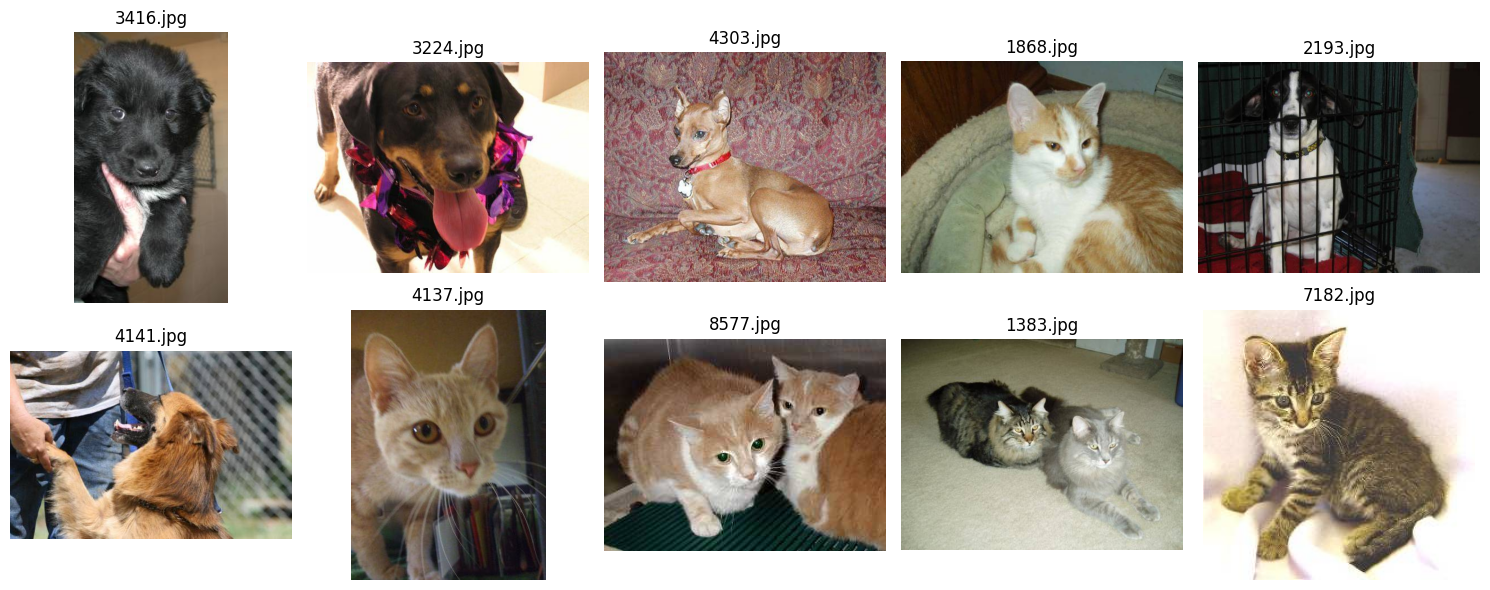

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random

# Set the path to the directory containing the image files
path = Path().absolute()
print(f"{path=}")

# Correctly set up the absolute path as a Path object
absolute_path = Path(r"c:/Users/Burai/OneDrive/Documents/GitHub/Brian-Gomez-Santiestevez-OPA23GB/ML_pt2_Labb2/original_data/test/test")

# List all .jpg image files in the directory
image_files = list(absolute_path.glob('*.jpg'))

# Check if there are enough files to sample from
if len(image_files) < 10:
    raise ValueError("Not enough image files to sample 10 items.")

# randomly select 10 image files
random_files = random.sample(image_files, 10)

# figure to display the images in a grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Adjust subplot grid as needed
axes = axes.flatten()

# Read and display each image file
for ax, file_path in zip(axes, random_files):
    # Read the image using OpenCV
    image = cv2.imread(str(file_path), cv2.IMREAD_UNCHANGED)
    # Convert BGR to RGB (OpenCV loads images in BGR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Display the image
    ax.imshow(image_rgb)
    ax.axis('off')  # Hide axes
    ax.set_title(file_path.name)  #set the file name as title

plt.tight_layout()
plt.show()


In [ ]:
# import shutil
# from pathlib import Path
# import random

# def create_directory_structure(base_dir):
#     # Define the base directory as a Path object
#     base_path = Path(base_dir)
    
#     # List of directories to create
#     directories = [
#         'experiment_small_data/test',
#         'experiment_small_data/train',
#         'experiment_small_data/val',
#         'experiment_tiny_data/test',
#         'experiment_tiny_data/train',
#         'experiment_tiny_data/val'
#     ]
    
#     # Loop through the directories list and create each one
#     for directory in directories:
#         (base_path / directory).mkdir(parents=True, exist_ok=True)
    
#     print("Directory structure created successfully!")

# def distribute_files(base_dir, source_dir, experiments):
#     patterns = {
#         'dogs': 'dog.*.jpg',
#         'cats': 'cat.*.jpg'
#     }
    
#     # Initialize dictionaries to store images
#     images = { 'dogs': [], 'cats': [] }

#     # Populate dictionaries by filtering with patterns and ensuring 1250 files each
#     for file in source_dir.glob('*.jpg'):
#         if 'dog' in file.name and len(images['dogs']) < 1250:
#             images['dogs'].append(file)
#         elif 'cat' in file.name and len(images['cats']) < 1250:
#             images['cats'].append(file)
    
#     # Check if we have enough images
#     if len(images['dogs']) < 1250 or len(images['cats']) < 1250:
#         print(f"Not enough images: Found {len(images['dogs'])} dogs and {len(images['cats'])} cats.")
#         return
    
#     # Handle the distribution for each experiment
#     for experiment, splits in experiments.items():
#         for category, img_list in images.items():
#             random.shuffle(img_list)

#             # Calculate the number of files for each subset based on the specifications
#             num_train = splits['train']
#             num_val = splits['val']
#             num_test = splits['test']

#             # Split images into train, val, and test
#             train_images = img_list[:num_train]
#             val_images = img_list[num_train:num_train + num_val]
#             test_images = img_list[num_train + num_val:num_train + num_val + num_test]

#             # Move files to their new destinations
#             for img_list, split in zip([train_images, val_images, test_images], ['train', 'val', 'test']):
#                 target_path = base_dir / experiment / split
#                 target_path.mkdir(parents=True, exist_ok=True)  # Ensure target directory exists
#                 for image in img_list:
#                     try:
#                         shutil.move(str(image), target_path / image.name)  # Use move instead of copy to avoid duplicates
#                     except FileNotFoundError:
#                         print(f"File not found, skipping: {image}")

# # Define the base directory and the source directory
# base_dir = Path(r'C:/Users/Burai/OneDrive/Documents/GitHub/Brian-Gomez-Santiestevez-OPA23GB/ML_pt2_Labb2')
# source_dir = base_dir / 'original_data/train/train'  # Updated path to the combined directory

# # Create the necessary directory structure
# create_directory_structure(base_dir)

# # Define the experiments and the number of images per category for each split
# experiments = {
#     'experiment_small_data': {'train': 800, 'val': 200, 'test': 250},  # Each number is per category
#     'experiment_tiny_data': {'train': 80, 'val': 20, 'test': 25}       # Each number is per category
# }

# # Distribute files according to the defined splits
# distribute_files(base_dir, source_dir, experiments)

# print("Files have been distributed according to the defined splits.")





# # DONT RUN AGAIN. FILES HAVE BEEN MOVED ALREADY.

Split data into experiment_small_data folder

Train directory: C:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train
Validation directory: C:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\val
Test directory: C:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\test
Reading images from C:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train
Found 1600 images in C:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train
Reading images from C:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\val
Found 400 images in C:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\val
Reading images from C:\Users\Burai\OneDrive\Documents\GitHub\Brian

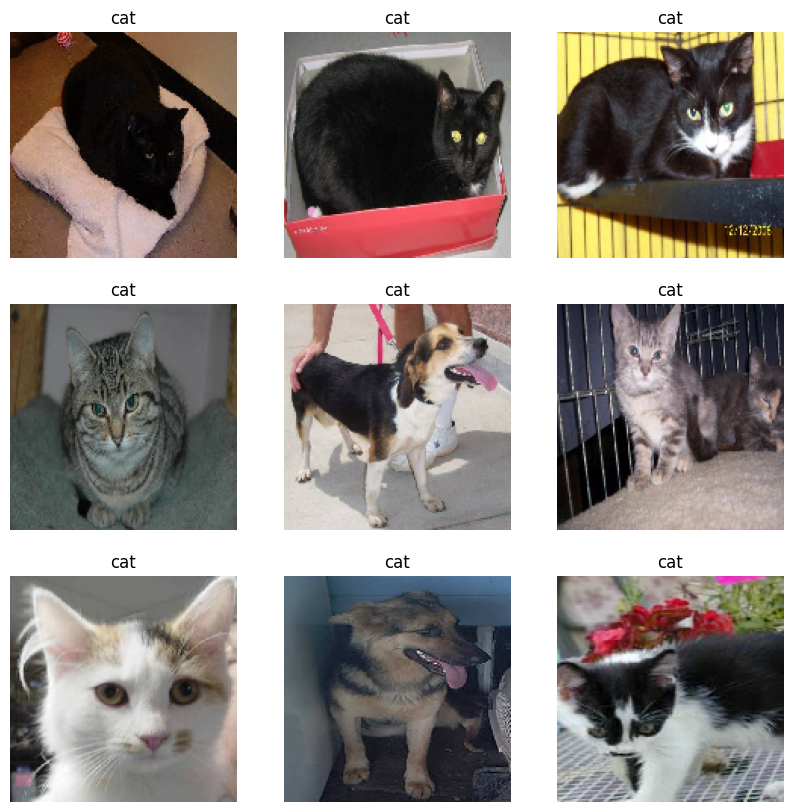

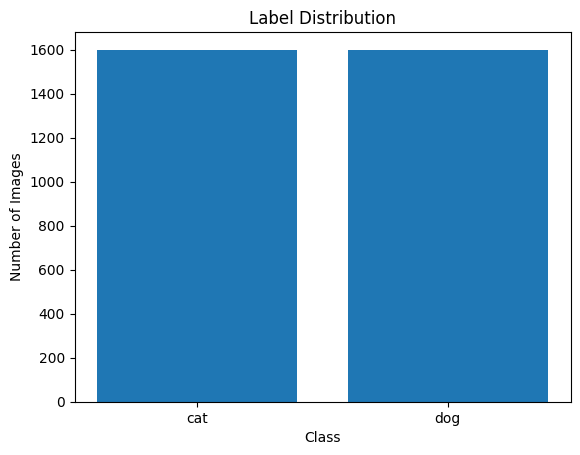

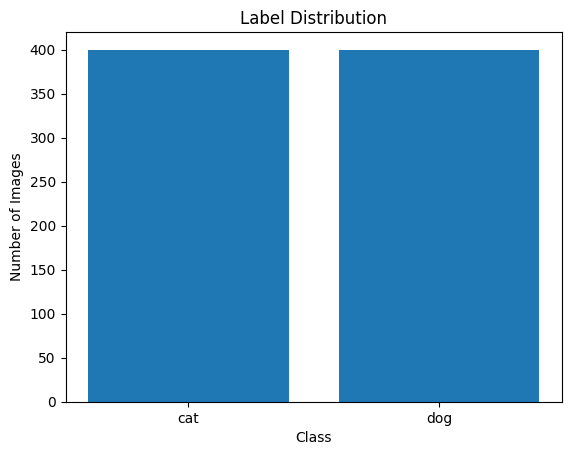

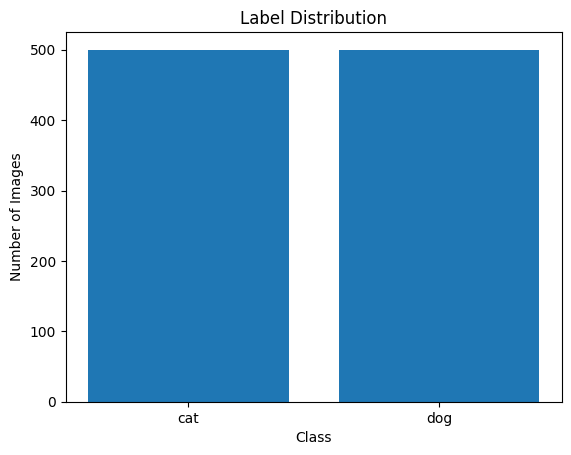

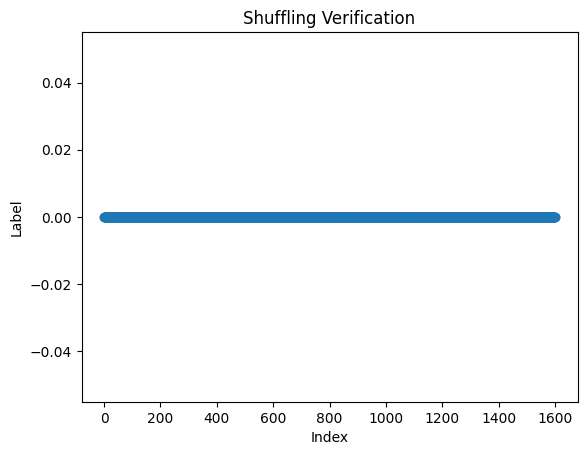

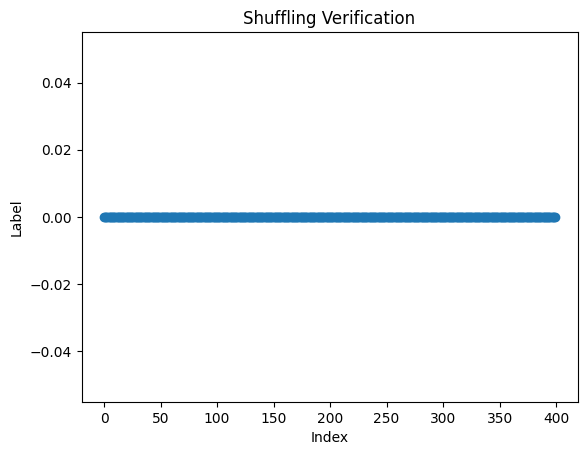

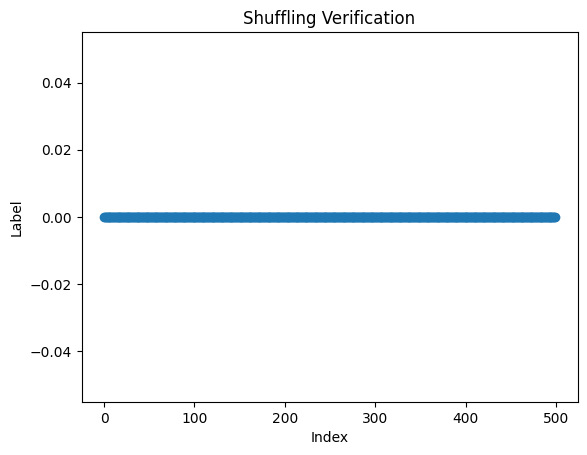

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle

def load_dataset(data_dir, target_size=(150, 150)):
    data = []
    labels = []
    data_dir = Path(data_dir)
    
    # Debug: print the directory being read #I had ChatGPT help me with debugging beacuse I was getting lazy.
    print(f"Reading images from {data_dir}")
    
    for img_path in data_dir.glob("*.jpg"):
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        data.append(img_array)
        if 'dog' in img_path.name:
            labels.append("dog")
        elif 'cat' in img_path.name:
            labels.append("cat")
    
    # Debug: print the number of images read
    print(f"Found {len(data)} images in {data_dir}")
    
    return np.array(data), np.array(labels)

def one_hot_encode(labels):
    lb = LabelBinarizer()
    labels = lb.fit_transform(labels)
    return labels

def plot_images_with_labels(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

def plot_label_distribution(labels, class_names):
    unique, counts = np.unique(labels, return_counts=True)
    plt.bar(class_names, counts)
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title("Label Distribution")
    plt.show()

def plot_shuffling(labels):
    plt.plot(labels, 'o')
    plt.xlabel("Index")
    plt.ylabel("Label")
    plt.title("Shuffling Verification")
    plt.show()

base_dir = Path('C:/Users/Burai/OneDrive/Documents/GitHub/Brian-Gomez-Santiestevez-OPA23GB/ML_pt2_Labb2/experiment_small_data')
train_dir = base_dir / 'train'
val_dir = base_dir / 'val'
test_dir = base_dir / 'test'

# Verify directory paths
print(f"Train directory: {train_dir}")
print(f"Validation directory: {val_dir}")
print(f"Test directory: {test_dir}")

# Load datasets
train_images, train_labels = load_dataset(train_dir)
val_images, val_labels = load_dataset(val_dir)
test_images, test_labels = load_dataset(test_dir)

# Debugging prints
print(f"Loaded {len(train_images)} training images.")
print(f"Loaded {len(val_images)} validation images.")
print(f"Loaded {len(test_images)} testing images.")

# Ensure there are images loaded
if len(train_images) == 0:
    raise ValueError("The training dataset has no images.")
if len(val_images) == 0:
    raise ValueError("The validation dataset has no images.")
if len(test_images) == 0:
    raise ValueError("The testing dataset has no images.")

# One-hot encode labels
train_labels = one_hot_encode(train_labels)
val_labels = one_hot_encode(val_labels)
test_labels = one_hot_encode(test_labels)

# Shuffle data
train_images, train_labels = shuffle(train_images, train_labels)
val_images, val_labels = shuffle(val_images, val_labels)
test_images, test_labels = shuffle(test_images, test_labels)

# Class names for plotting
class_names = ["cat", "dog"]

# Plot some images with labels
plot_images_with_labels(train_images, np.argmax(train_labels, axis=1), class_names)

# Verify dataset balance
plot_label_distribution(np.argmax(train_labels, axis=1), class_names)
plot_label_distribution(np.argmax(val_labels, axis=1), class_names)
plot_label_distribution(np.argmax(test_labels, axis=1), class_names)

# Verify shuffling
plot_shuffling(np.argmax(train_labels, axis=1))
plot_shuffling(np.argmax(val_labels, axis=1))
plot_shuffling(np.argmax(test_labels, axis=1))


## pick size to use

large size
- a lot of details
- risk for overfitting
- computationally costly


small size
- cheaper computation
- less details


something to onside
- don't go outside of the range of your distribution
- ex  (150, 150), (180, 200), (120, 120) utgångspunkt
- size by itself is a hyperparameter






In [11]:
#Proto-Code

image_resize = np.array([cv2.resize(image, widths, heights) for image in images])

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - dst is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'dst'
